In [1]:
import seaborn as sns 
iris = sns.load_dataset('iris')
# iris 데이터 불러오기
X = iris.drop('species',axis = 1)
# 특성변수만으로 구성된 X data frame 생성 
y = iris['species']
# 분류의 목적 변수만으로 구성된 y_data frame 생성 

from sklearn.preprocessing import LabelEncoder 
# 범주형 변수 숫자로 치환하는 함수 
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values)


from sklearn.model_selection import train_test_split
# train set 과 test set 으로 데이터 나누기 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1, stratify = y)


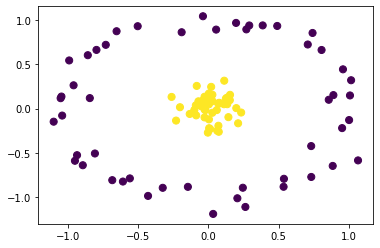

In [2]:
# kernel svm 

# 평면상의 자료의 표현 

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 100,noise = 0.1, factor = 0.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50)

In [4]:
#kernel svm 이해 예제 

import numpy as np 
r = np.exp(-(X ** 2).sum(1))
from ipywidgets import interact,fixed
from mpl_toolkits import mplot3d

def plot_3D(elev=30,azim = 30,X  = X, y = y ):
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:,0], X[:,1],r,c=y,s=50,cmap='autumn')
    ax.view_init(azim=50,elev=30)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
interact(plot_3D,elev=[-90,90], azip=(-180,180),X = fixed(X), y=fixed(y))


interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

<function __main__.plot_3D>

In [5]:
from sklearn.svm import SVC 
ksvm = SVC(kernel='rbf',C = 1.0,gamma=0.2,random_state=42)
ksvm.fit(X_train,y_train)
y_train_pred=ksvm.predict(X_train)
y_test_pred=ksvm.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))


0.9619047619047619
0.9777777777777777


In [9]:
metrics.confusion_matrix(y_test,y_test_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

In [10]:
print(ksvm.n_support_)

[ 5 16 18]
